### Математические и статистические методы в прикладных задачах экономики и бизнеса
### Факторный анализ
#### Исследуемые данные: Леденцы.csv

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer # Взят функционал из R-psych 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

% matplotlib inline
% config InlineBackend.figure_format = 'retina'

In [2]:
# Прочитаем данные анкет по леденцам
df = pd.read_csv(r'Леденцы.csv', encoding = 'cp1251', sep =';')

In [3]:
df.head()

,освежить дыхание,чувствовать себя увереннее,освежить полость рта,избавиться от неприятного вкуса во рту,заменитель других кондитерских изделий,хочется чего-нибудь сладкого,помогают сконцентрироваться,отвлечься на несколько минут и подумать,облегчить боль в горле,избавиться от заложенности носа,для улучшения самочувствия
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [4]:
# Посмотрим размерность датасета
print('Строк: {}\nПризнаков: {}'.format(df.shape[0], df.shape[1]))

Строк: 338
Признаков: 11


In [5]:
# Подробная сводка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
освежить дыхание                           338 non-null int64
чувствовать себя увереннее                 338 non-null int64
освежить полость рта                       338 non-null int64
избавиться от неприятного вкуса во рту     338 non-null int64
заменитель других кондитерских изделий     338 non-null int64
хочется чего-нибудь сладкого               338 non-null int64
помогают сконцентрироваться                338 non-null int64
отвлечься на несколько минут и подумать    338 non-null int64
облегчить боль в горле                     338 non-null int64
избавиться от заложенности носа            338 non-null int64
для улучшения самочувствия                 338 non-null int64
dtypes: int64(11)
memory usage: 29.1 KB


Пропущенных значений не обнаружено. Можно работать с исходными данными.

In [6]:
df.describe()

,освежить дыхание,чувствовать себя увереннее,освежить полость рта,избавиться от неприятного вкуса во рту,заменитель других кондитерских изделий,хочется чего-нибудь сладкого,помогают сконцентрироваться,отвлечься на несколько минут и подумать,облегчить боль в горле,избавиться от заложенности носа,для улучшения самочувствия
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


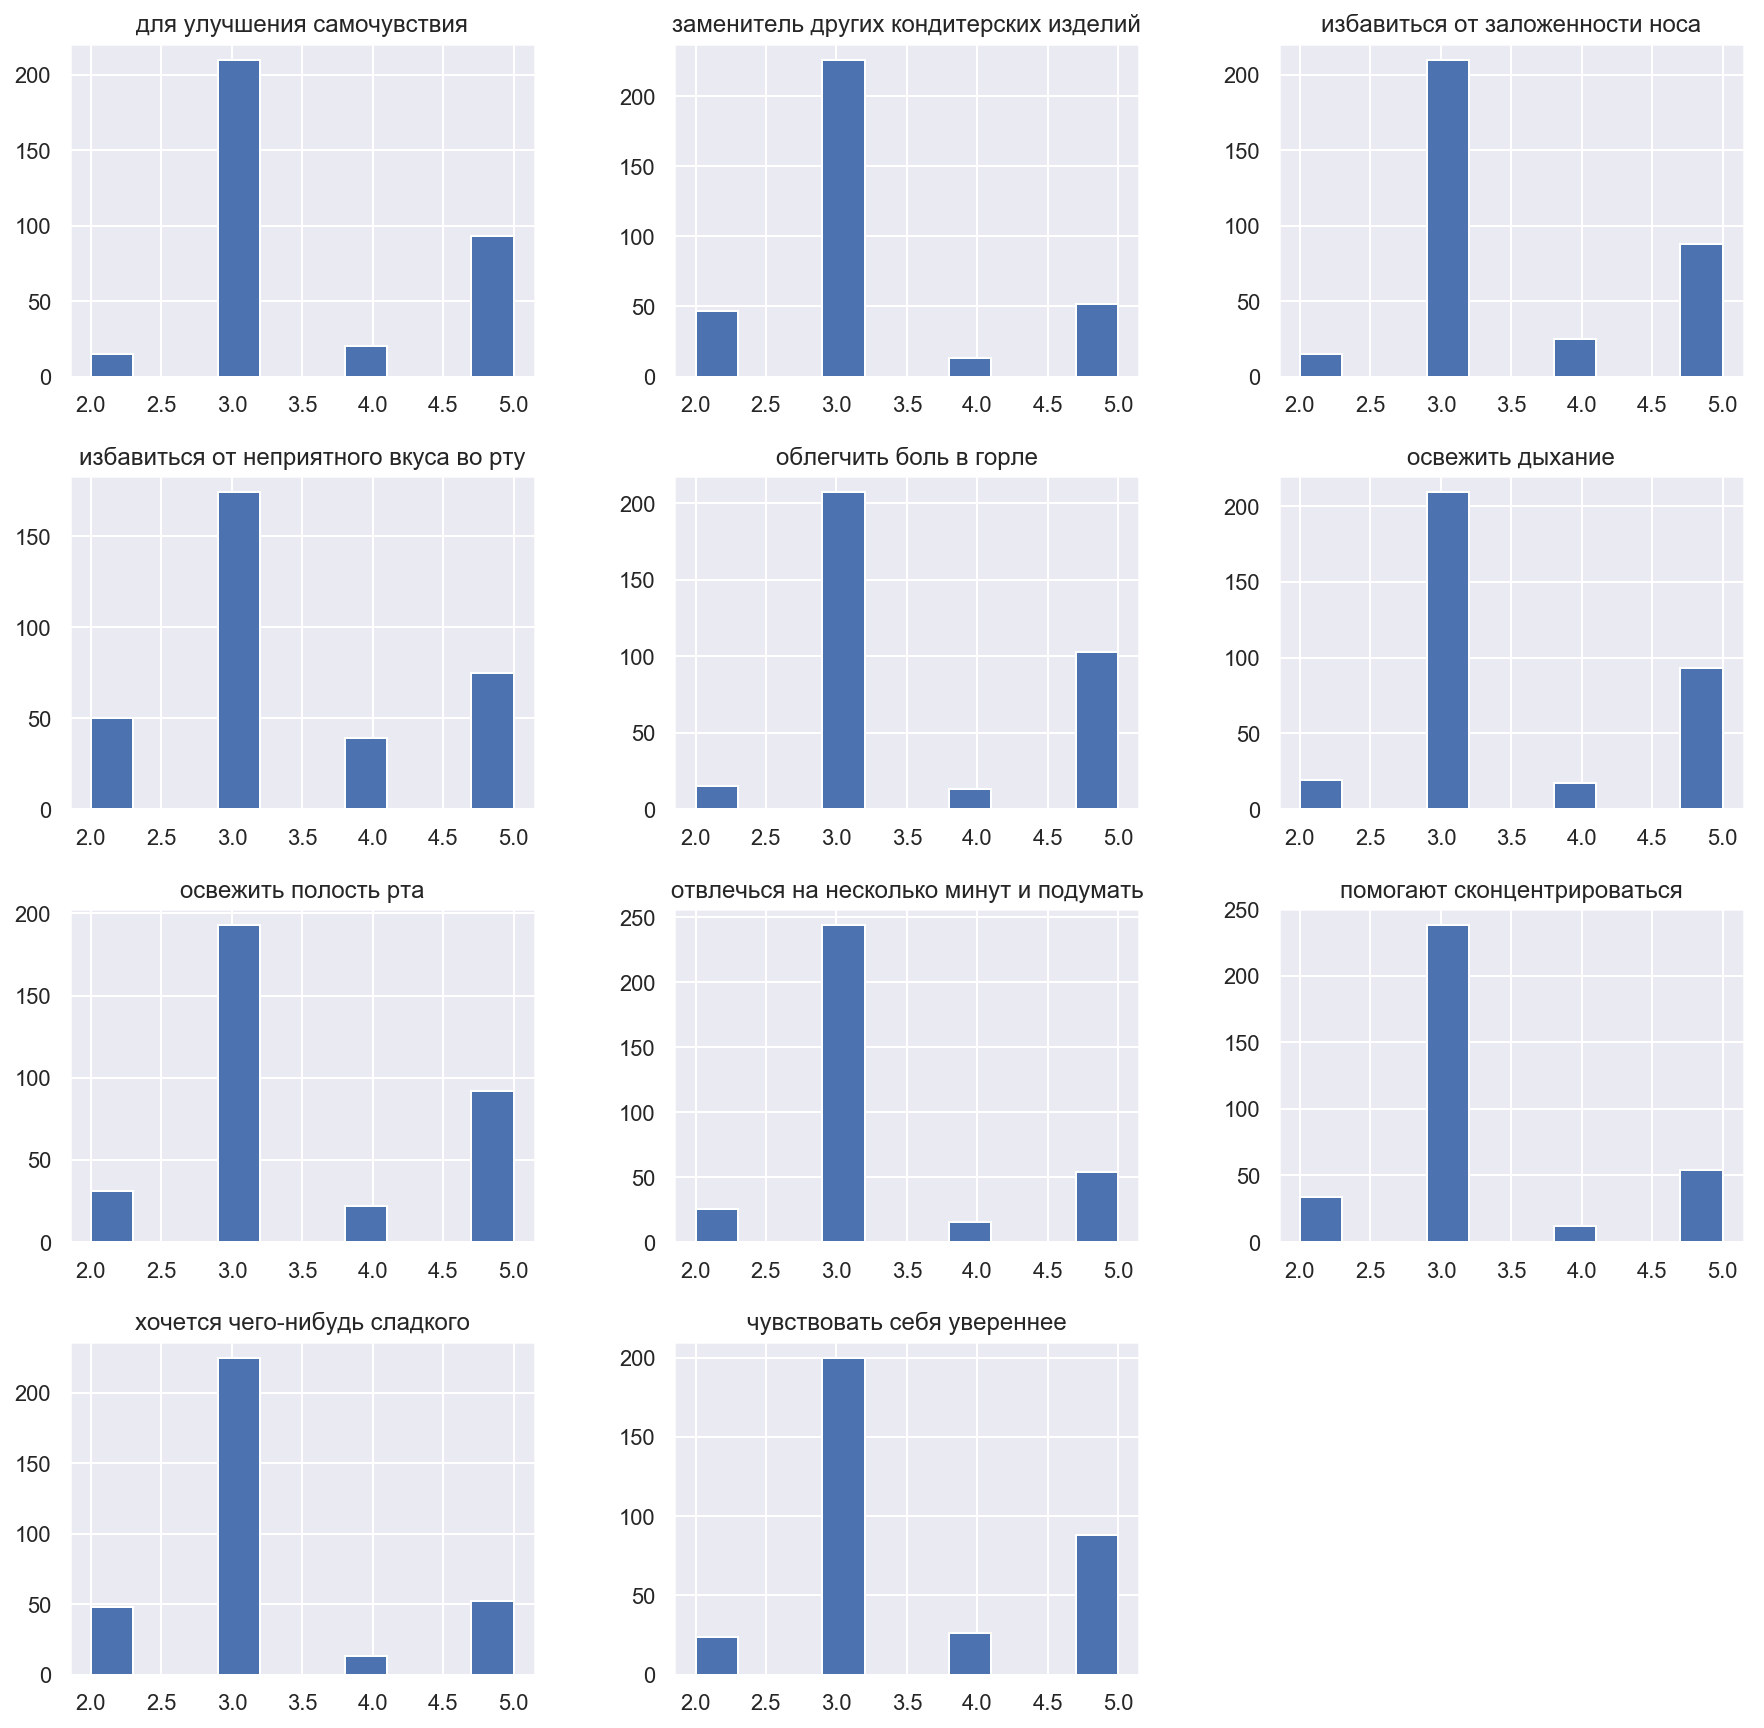

In [7]:
df.hist(figsize = (15,15))
plt.show()

Похоже, что в первом приближении люди склонны выставлять средние оценки всем имеющимся вопросам в анкете про леденцы.

In [8]:
# Изучим коррелируемость признаков
df.corr()

,освежить дыхание,чувствовать себя увереннее,освежить полость рта,избавиться от неприятного вкуса во рту,заменитель других кондитерских изделий,хочется чего-нибудь сладкого,помогают сконцентрироваться,отвлечься на несколько минут и подумать,облегчить боль в горле,избавиться от заложенности носа,для улучшения самочувствия
освежить дыхание,1.000000,0.899539,0.899093,0.861459,-0.039758,-0.037705,-0.131739,-0.224225,-0.432416,-0.422820,-0.425076
чувствовать себя увереннее,0.899539,1.000000,0.974008,0.918605,-0.056749,-0.051146,-0.170143,-0.243930,-0.410932,-0.408131,-0.410322
освежить полость рта,0.899093,0.974008,1.000000,0.933310,-0.028481,-0.023172,-0.161636,-0.232446,-0.431511,-0.417980,-0.422759
избавиться от неприятного вкуса во рту,0.861459,0.918605,0.933310,1.000000,0.049004,0.053720,-0.082780,-0.146652,-0.474584,-0.462838,-0.465190
заменитель других кондитерских изделий,-0.039758,-0.056749,-0.028481,0.049004,1.000000,0.990175,0.008874,-0.105314,-0.537177,-0.518580,-0.517738
хочется чего-нибудь сладкого,-0.037705,-0.051146,-0.023172,0.053720,0.990175,1.000000,0.038171,-0.087211,-0.554675,-0.533518,-0.532365
помогают сконцентрироваться,-0.131739,-0.170143,-0.161636,-0.082780,0.008874,0.038171,1.000000,0.937104,-0.383938,-0.372838,-0.371665
отвлечься на несколько минут и подумать,-0.224225,-0.243930,-0.232446,-0.146652,-0.105314,-0.087211,0.937104,1.000000,-0.257491,-0.260681,-0.262098
облегчить боль в горле,-0.432416,-0.410932,-0.431511,-0.474584,-0.537177,-0.554675,-0.383938,-0.257491,1.000000,0.972884,0.963874
избавиться от заложенности носа,-0.422820,-0.408131,-0.417980,-0.462838,-0.518580,-0.533518,-0.372838,-0.260681,0.972884,1.000000,0.991760


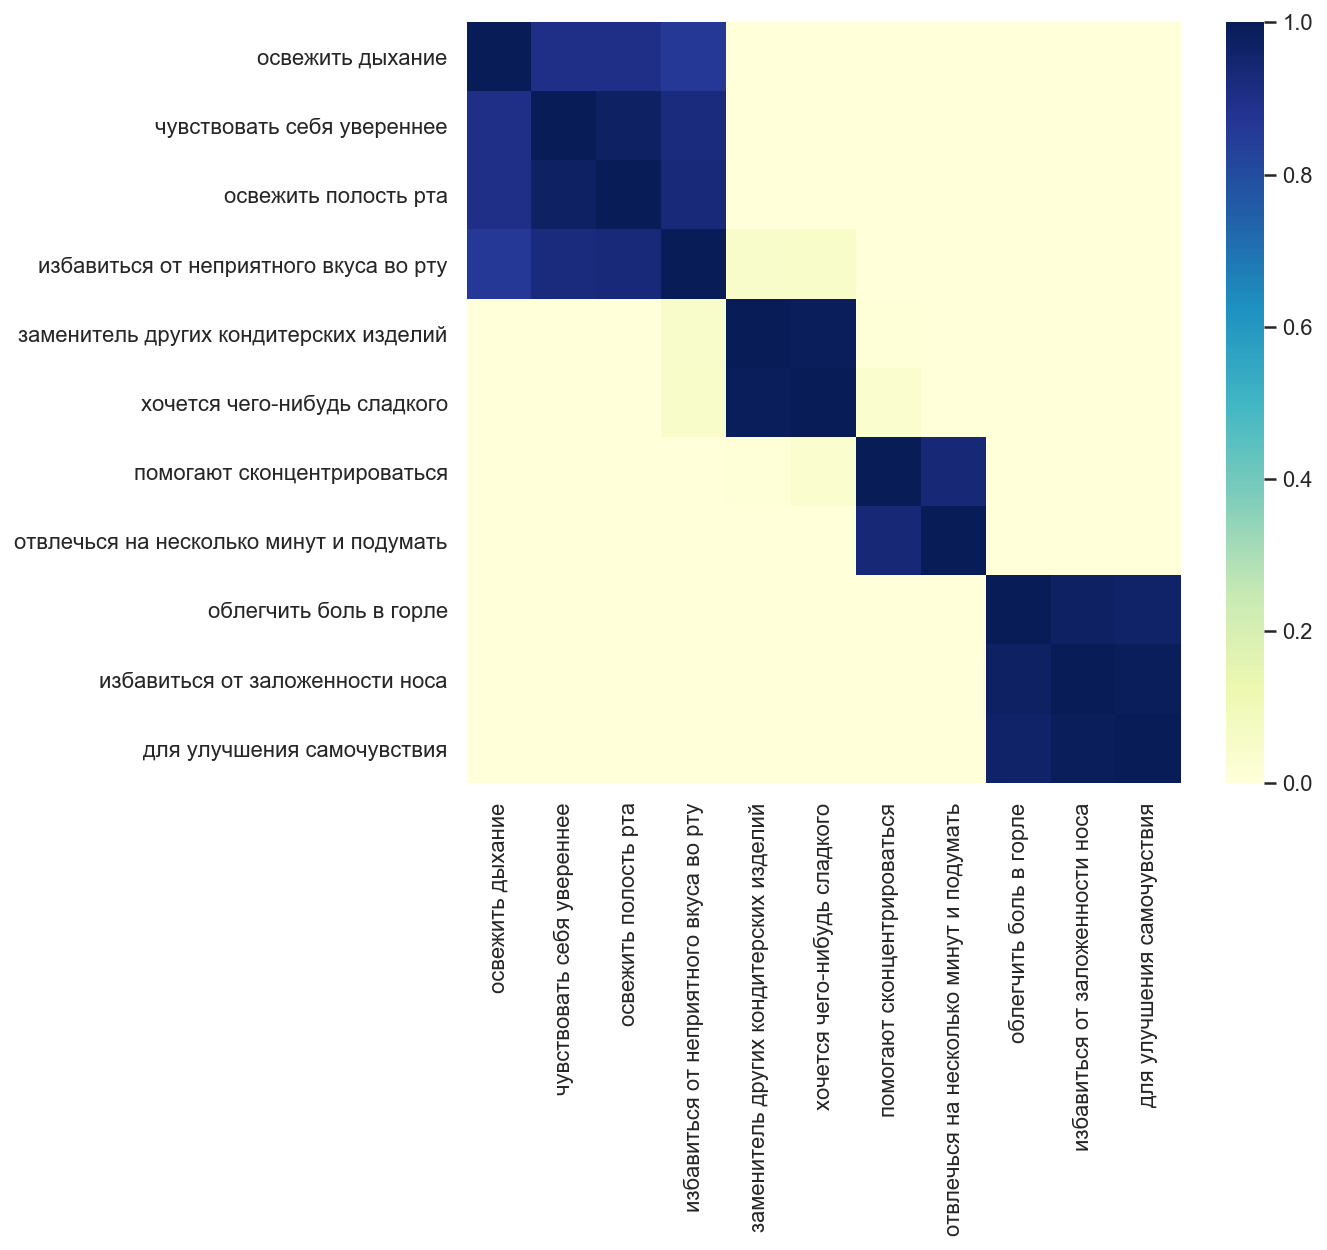

In [9]:
# Теплокарта матрицы корреляций 
fig = plt.figure(figsize=(8,7))
ax = sns.heatmap(df.corr(), vmin=0, vmax=1, cmap = 'YlGnBu')
plt.show()

Теплокарта матрицы корреляций показывает наличие числа существенно взаимозависимых признаков.
А значит, может быть обоснована некоторая факторизация их на категории и снижение размерности.

__В сущности теплокарта показывает 4 коррелированных группы признаков. Потенциальное число новых факторов, включающих максимум возможной информации в данных - именно 4.__

In [10]:
# Перечислем коррелируемые признаки, лежащие в разумном интервале (low, high)
def get_correlated(data, low, high = 1.0):
    # Готовим
    columns = data.columns.tolist()
    columns_dict = {}
    df_bool = (data.corr() > low)&(data.corr() < high)   
    # Соберем коррелируемые признаки
    for i, col in enumerate(columns):
        bool_list = list(df_bool[col] == True)
        tmp = []
        for i, el in enumerate(bool_list):
            if el == True:
                tmp.append(columns[i])
            else:
                pass
        # Процесс наполнения словаря
        #print('Processed column: {}||{}|| match: {}'.format(i, col, len(tmp)))
        columns_dict[col] = tmp 
    # Выведем списки 
    for col in columns_dict:       
        print('Feature: {}|Correlates between ({}, {})\n with {}\n'.format(col, low, high, columns_dict[col] ))  

In [11]:
# Ограничимся всеми признаками, коррелирующими более чем на 0.8
get_correlated(df, low = 0.8)

Feature: освежить дыхание|Correlates between (0.8, 1.0)
 with ['чувствовать себя увереннее', 'освежить полость рта', 'избавиться от неприятного вкуса во рту']

Feature: чувствовать себя увереннее|Correlates between (0.8, 1.0)
 with ['освежить дыхание', 'освежить полость рта', 'избавиться от неприятного вкуса во рту']

Feature: освежить полость рта|Correlates between (0.8, 1.0)
 with ['освежить дыхание', 'чувствовать себя увереннее', 'избавиться от неприятного вкуса во рту']

Feature: избавиться от неприятного вкуса во рту|Correlates between (0.8, 1.0)
 with ['освежить дыхание', 'чувствовать себя увереннее', 'освежить полость рта']

Feature: заменитель других кондитерских изделий|Correlates between (0.8, 1.0)
 with ['хочется чего-нибудь сладкого']

Feature: хочется чего-нибудь сладкого|Correlates between (0.8, 1.0)
 with ['заменитель других кондитерских изделий']

Feature: помогают сконцентрироваться|Correlates between (0.8, 1.0)
 with ['отвлечься на несколько минут и подумать']

Featur

In [12]:
# Стандартизируем признаки
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


__PCA__

In [13]:
# Исследуем возможность применения PCA.
from sklearn.decomposition import PCA
def get_pca(data, n):
    pca = PCA(n_components = n)
    pca.fit(data)

    print('PCA explained variance ratio: {}\nSum:{}'.format(
          pca.explained_variance_ratio_.tolist(),
          sum(pca.explained_variance_ratio_.tolist()))
         ) 

In [14]:
get_pca(df_scaled, 2)

PCA explained variance ratio: [0.4653632098177921, 0.286699916788273]
Sum:0.7520631266060651


In [15]:
get_pca(df_scaled, 3)

PCA explained variance ratio: [0.4653632098177921, 0.286699916788273, 0.1790820545623431]
Sum:0.9311451811684082


In [16]:
get_pca(df_scaled, 4)

PCA explained variance ratio: [0.4653632098177921, 0.286699916788273, 0.1790820545623431, 0.037532839549889056]
Sum:0.9686780207182972


Как было предположено, PCA при выборе 4 компонент помогает сохранить 96,8% дисперсии данных, которую мы можем интерпретировать как полезную информацию о ситуации.

__T-SNE__

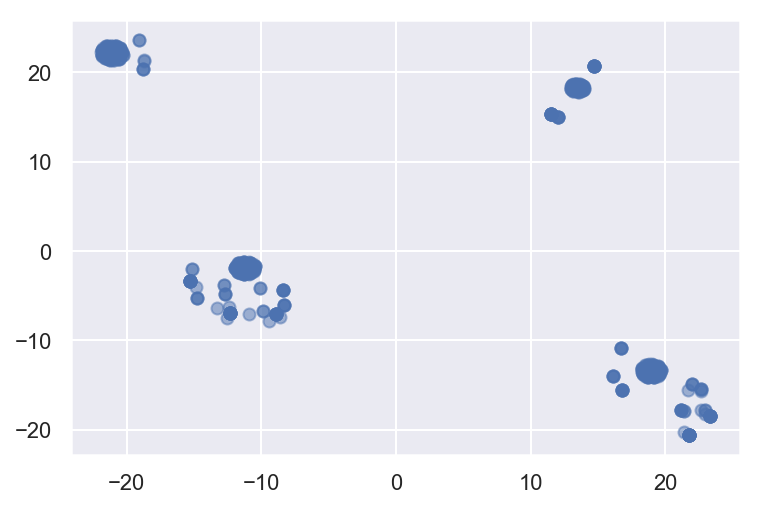

In [17]:
# Исследуем возможность применения T-SNE метода.
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
tsne_representation = tsne.fit_transform(df_scaled)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], alpha = 0.5)
plt.show()

Визуализация с T-SNE аналогично выделяет 4 кластера в исследуемых данных.

__Varimax rotation__

In [18]:
factors = 4
fit = 'ml'
rotation = 'varimax'

fa = FactorAnalyzer()
fa.analyze(
           df, 
           factors, 
           rotation,
           fit
           )
# Стандартизация происходит в пакете
fa.loadings

,Factor1,Factor2,Factor3,Factor4
освежить дыхание,-0.235938,-0.124026,0.872608,-0.065894
чувствовать себя увереннее,-0.186165,-0.122325,0.955939,-0.059428
освежить полость рта,-0.176801,-0.103113,0.969469,-0.024568
избавиться от неприятного вкуса во рту,-0.192447,-0.016416,0.926844,0.054168
заменитель других кондитерских изделий,-0.299845,-0.070227,-0.067588,0.941457
хочется чего-нибудь сладкого,-0.309017,-0.051043,-0.061741,0.945049
помогают сконцентрироваться,-0.240673,0.912569,-0.111355,0.000877
отвлечься на несколько минут и подумать,-0.154602,0.965715,-0.167899,-0.101507
облегчить боль в горле,0.817354,-0.230418,-0.327218,-0.352871
избавиться от заложенности носа,0.871732,-0.215820,-0.303454,-0.311014


Метод Varimax окончательно подтверждает гипотезу о наличии 4 блоков, 4 факторов, отражающих в целом смысловую нагрузку по нескольким показателям, согласно представленным данным.

   1. __`Factor 1:`__ Основная причина потребления леденцов респондентами - улучшение физиологического самочувствия.
   2. __`Factor 2:`__ Основная причина потребления леденцов респондентами - концентрация внимания.
   3. __`Factor 3:`__ Основная причина потребления леденцов респондентами - свежесть полости рта, придающая уверенности.
   4. __`Factor 4:`__ Основная причина потребления леденцов респондентами - заменитель сладостей.
   
   

Как итог всему анализу выше, после интерпретации обработаем анкеты по поулчившимся факторам согласно Varimax rotation.

In [19]:
# Новые факторы для результатов анкетирования
new_df = fa.get_scores(df)
new_df.head()

,Factor1,Factor2,Factor3,Factor4
0,-0.324878,-0.195002,1.430045,-0.266839
1,-0.471172,-0.272276,1.136405,-0.334320
2,-0.647614,-0.370330,0.816908,-0.425790
3,-0.471172,-0.272276,1.136405,-0.334320
4,-0.324878,-0.195002,1.430045,-0.266839


In [20]:
# Категории респондентов
new_df['Cat'] = new_df.apply(lambda x: list(x).index(max(list(x))) + 1 ,axis = 1)

In [21]:
# Итоговое распределение ответов
data = new_df['Cat'].value_counts()/new_df.shape[0]
data = data.sort_values(ascending = False)
data

1    0.322485
3    0.316568
2    0.180473
4    0.180473
Name: Cat, dtype: float64

In [22]:
# Проверим, так ли это, выборочно взяв 1 респондента
pd.DataFrame([new_df.iloc[30]])

,Factor1,Factor2,Factor3,Factor4,Cat
30,-0.300319,-0.182229,1.490589,-0.25672,3.0


In [23]:
pd.DataFrame([df.iloc[30]])

,освежить дыхание,чувствовать себя увереннее,освежить полость рта,избавиться от неприятного вкуса во рту,заменитель других кондитерских изделий,хочется чего-нибудь сладкого,помогают сконцентрироваться,отвлечься на несколько минут и подумать,облегчить боль в горле,избавиться от заложенности носа,для улучшения самочувствия
30,5,5,5,5,3,3,3,3,3,3,3


Действительно, респондент отвел наибольшую важность пунктам свежести дыхания и уверенности.

Соответственно, его поведенческие предпочтения описывает 3 фактор, согласно итогам Varimax.

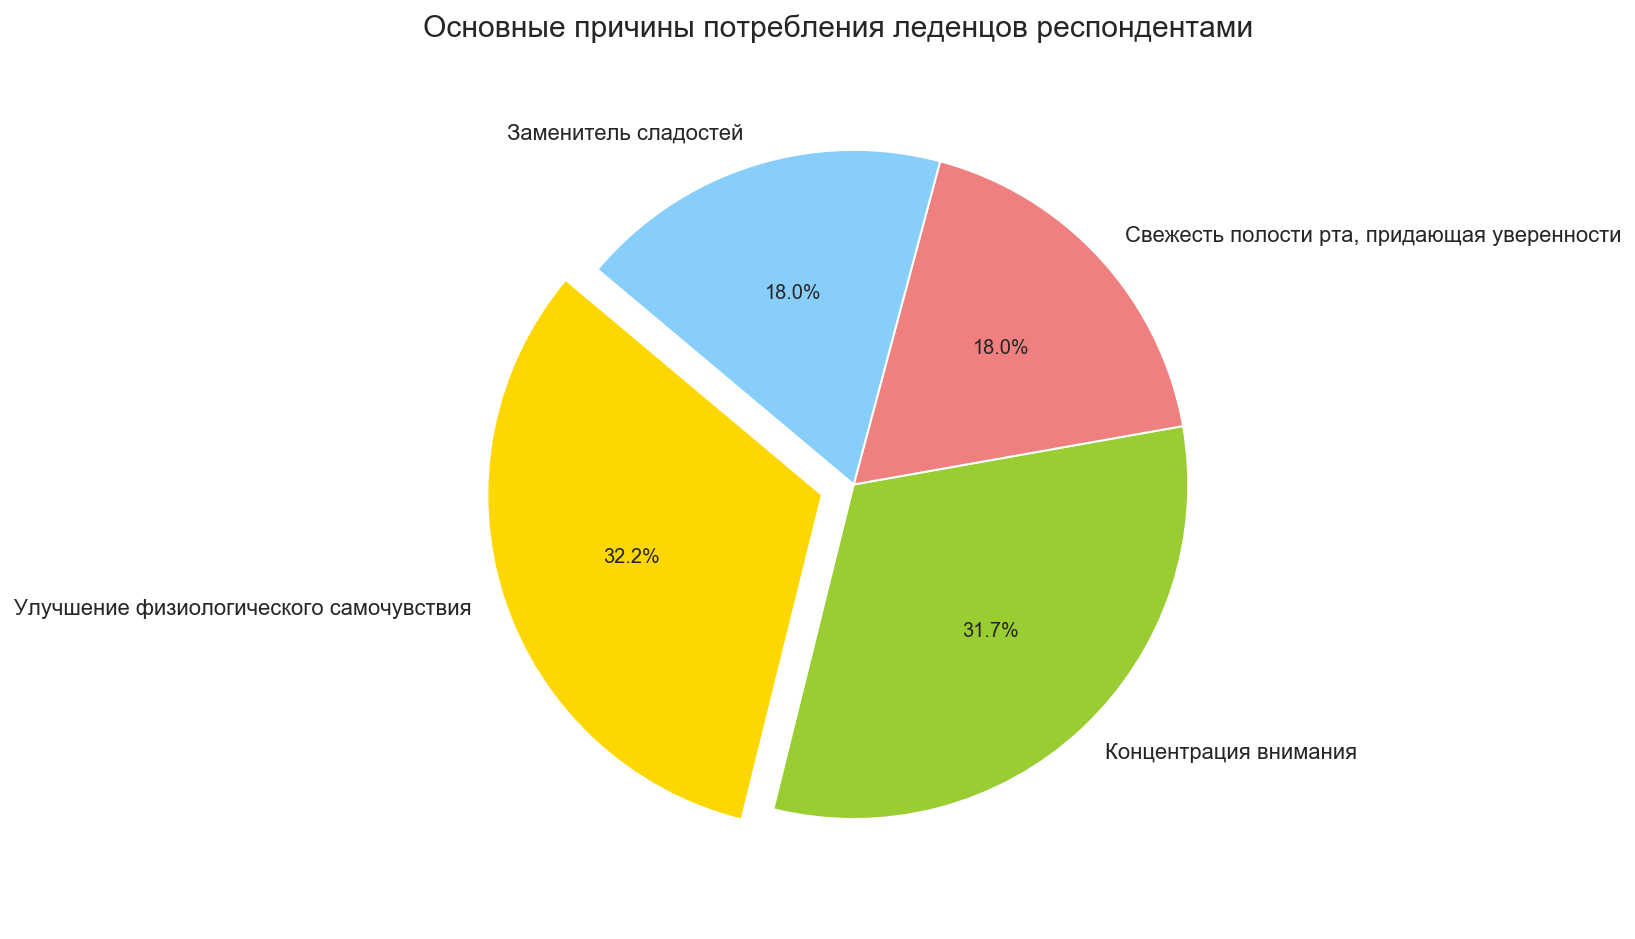

In [24]:
fig = plt.figure(figsize = (7,8))
labels = ['Улучшение физиологического самочувствия',
          'Концентрация внимания', 
          'Свежесть полости рта, придающая уверенности', 
          'Заменитель сладостей']

sizes = [data.iloc[i] for i in range(4)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)
plt.title(r'Основные причины потребления леденцов респондентами',fontsize = 15)
plt.axis('equal')
plt.show()